<a href="https://colab.research.google.com/github/MyCrabs/crawl_dt_GVDN/blob/master/TTNT_BT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thanhduy190903/ttnt-data

Dataset URL: https://www.kaggle.com/datasets/thanhduy190903/ttnt-data
License(s): Apache 2.0
 96% 78.0M/80.9M [00:03<00:00, 35.3MB/s]
100% 80.9M/80.9M [00:03<00:00, 26.7MB/s]


In [ ]:
from zipfile import ZipFile
dataset = "/content/ttnt-data.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("Extracted done")

Extracted done


In [ ]:
!ls

Dataset  kaggle.json  labels.csv  sample_data  ttnt-data.zip


In [ ]:
path = "Dataset"
labelFile = 'labels.csv'
batch_size_val=32
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2
validationRatio = 0.2

In [ ]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)

classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


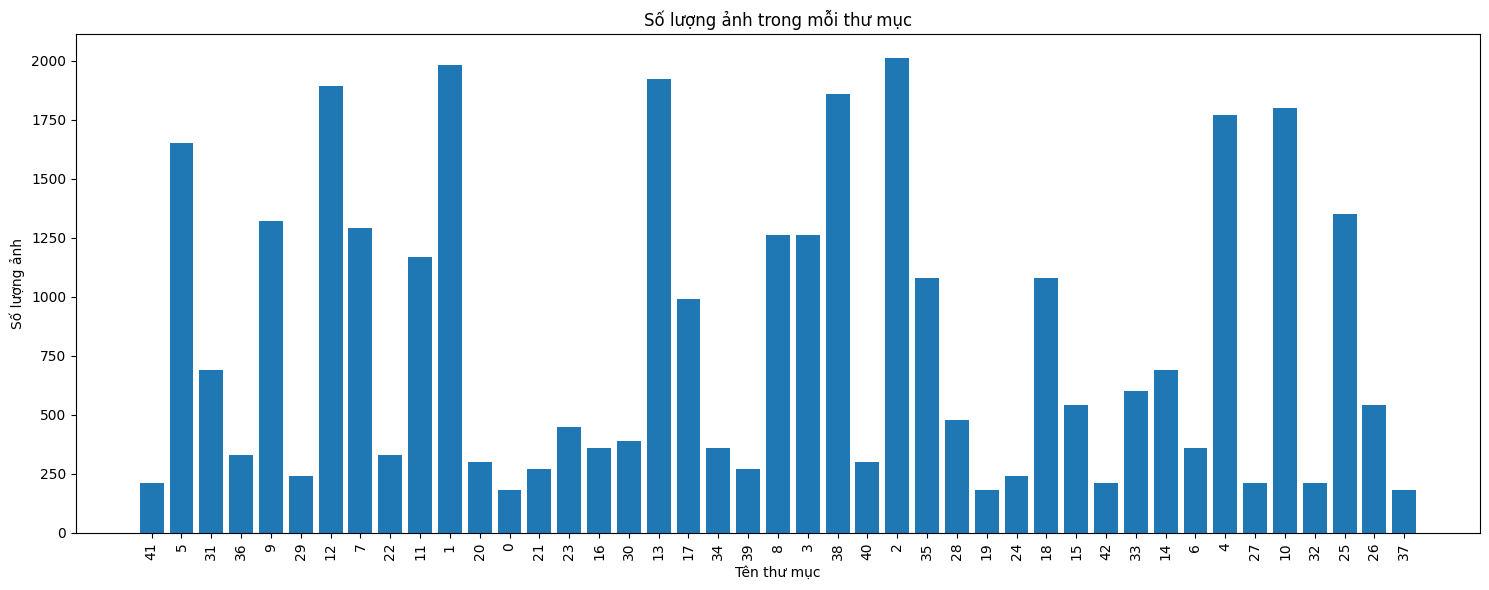

In [ ]:
image_counts = {}
data_dir = "Dataset"
# Lặp qua các thư mục con trong thư mục chính
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    # Đếm số lượng file ảnh trong thư mục con và lưu vào dictionary
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        image_counts[folder_name] = num_images

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.title('Số lượng ảnh trong mỗi thư mục')
plt.xlabel('Tên thư mục')
plt.ylabel('Số lượng ảnh')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

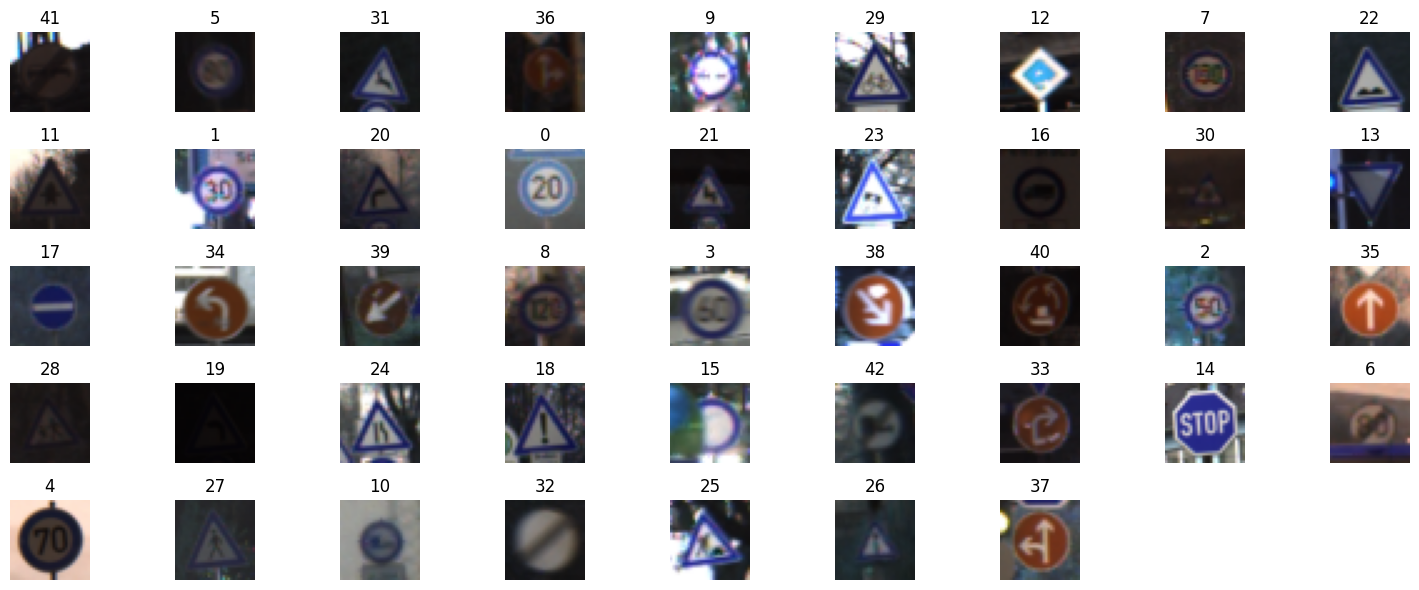

In [ ]:
import random
import matplotlib.image as mpimg
plt.figure(figsize=(15, 6))
for i, subfolder in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, subfolder)
    # Lấy danh sách tên file trong thư mục con
    files = os.listdir(folder_path)
    # Chọn một ảnh ngẫu nhiên
    random_image = random.choice(files)
    image_path = os.path.join(folder_path, random_image)
    # Hiển thị ảnh
    ax = plt.subplot(5, 9, i + 1)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(subfolder)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [ ]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [ ]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

num_of_samples = []
cols = 5
num_classes = noOfClasses

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [ ]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))


X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)


y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

## **CNN Model**

In [2]:
def myModel():
    model= Sequential()
    model.add((Conv2D(60,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(60, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add((Conv2D(30, (3,3),activation='relu')))
    model.add((Conv2D(30, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = myModel()
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=32),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

<ipython-input-17-2ff3064e59c9>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=32),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)


Epoch 1/10
695/695 [==============================] - 39s 39ms/step - loss: 2.3982 - accuracy: 0.3290 - val_loss: 0.7426 - val_accuracy: 0.7680
Epoch 2/10
695/695 [==============================] - 13s 19ms/step - loss: 1.1194 - accuracy: 0.6555 - val_loss: 0.2694 - val_accuracy: 0.9310
Epoch 3/10
695/695 [==============================] - 13s 19ms/step - loss: 0.7373 - accuracy: 0.7690 - val_loss: 0.1403 - val_accuracy: 0.9556
Epoch 4/10
695/695 [==============================] - 22s 31ms/step - loss: 0.5812 - accuracy: 0.8175 - val_loss: 0.1139 - val_accuracy: 0.9621
Epoch 5/10
695/695 [==============================] - 13s 19ms/step - loss: 0.4705 - accuracy: 0.8504 - val_loss: 0.0796 - val_accuracy: 0.9770
Epoch 6/10
695/695 [==============================] - 15s 21ms/step - loss: 0.4243 - accuracy: 0.8660 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 7/10
695/695 [==============================] - 15s 22ms/step - loss: 0.3874 - accuracy: 0.8800 - val_loss: 0.0449 - val_accuracy:

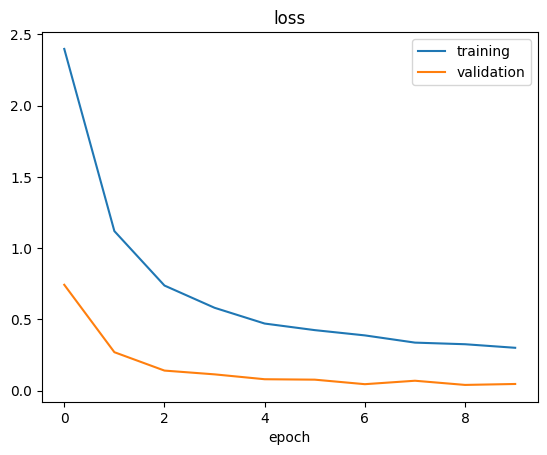

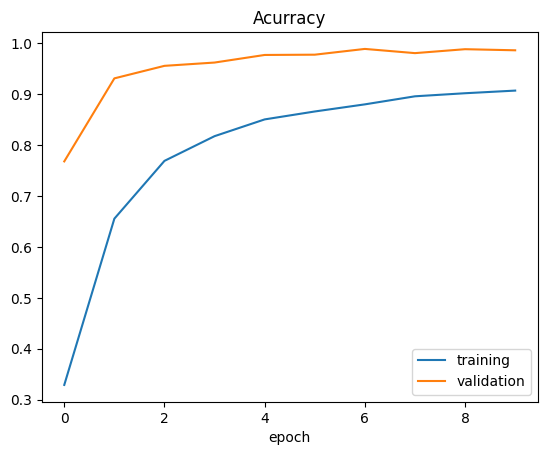

Test Score: 0.04938577115535736
Test Accuracy: 0.985775887966156


In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [ ]:
#model.save("model.h5")

## **Predict data**

In [ ]:
evaluation = model.evaluate(X_test, y_test)

# In kết quả đánh giá
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

218/218 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9858
Loss: 0.04938577115535736
Accuracy: 0.985775887966156


In [ ]:
test_image = X_test[0]
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)

# Chuyển đổi dự đoán thành nhãn dự đoán
predicted_label = np.argmax(prediction)

# In nhãn dự đoán
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 314ms/step
Predicted Label: 10


## **Metrics and Confusion matrix**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Dự đoán nhãn cho dữ liệu kiểm tra (X_test)
y_pred = model.predict(X_test)

# Chuyển đổi dự đoán từ dạng one-hot encoding sang nhãn dự đoán
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
# Tính toán các thông số đánh giá hiệu suất
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')


# In ra các thông số đánh giá hiệu suất
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

218/218 [==============================] - 0s 2ms/step
Accuracy: 0.9857758620689655
Precision: 0.9862947069128981
Recall: 0.9857758620689655


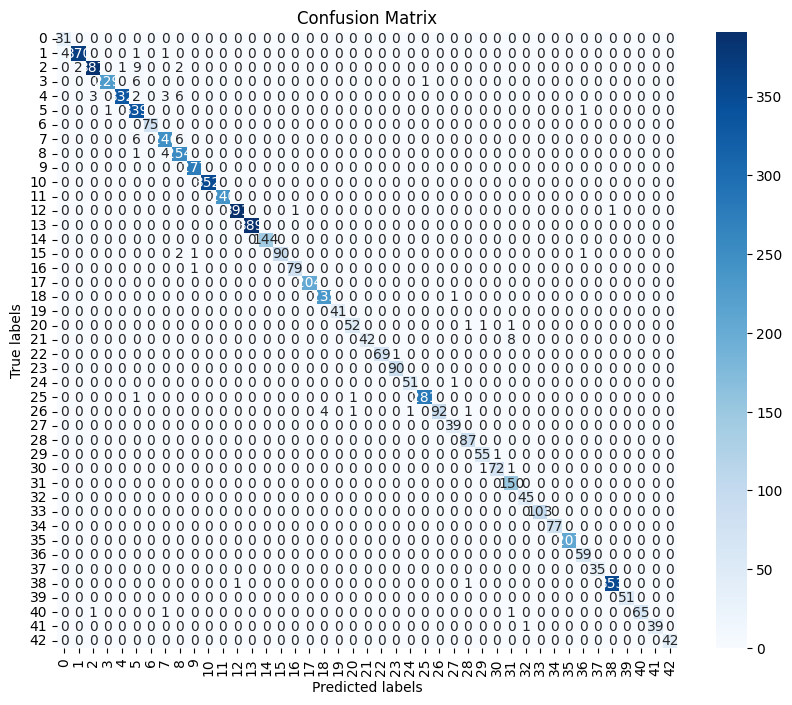

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
# Vẽ ma trận nhầm lẫn dưới dạng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Đặt tên cho các trục và tiêu đề
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()